# Notebook Import and Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Example 1

## $$f(x) = x^2 + x + 1$$

In [3]:
def f(x):
    return x**2 + x + 1

In [4]:
def df(x):
    return 2*x + 1

In [5]:
#Make Data
x_1 = np.linspace(start = -3, stop = 3, num = 500)

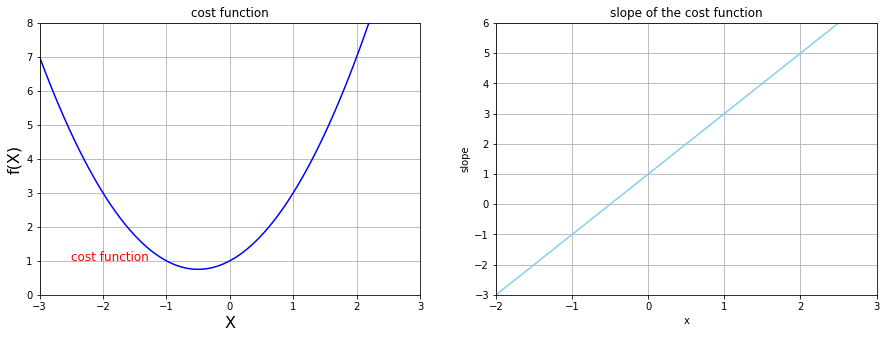

In [6]:
# plot function and derivative side by side

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('cost function')
plt.xlim(-3,3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(X)', fontsize = 16)
plt.text(-2.5, 1 , 'cost function', c='red', fontsize=12)
plt.plot(x_1, f(x_1), 'blue')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(x_1, df(x_1), c='skyblue')
plt.xlabel('x')
plt.ylabel('slope')
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.title('slope of the cost function')
plt.grid()
plt.show()

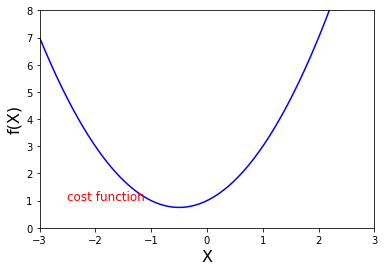

In [7]:
# plot
plt.xlim(-3,3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(X)', fontsize = 16)
plt.text(-2.5, 1 , 'cost function', c='red', fontsize=12)
plt.plot(x_1, f(x_1), 'blue')
plt.show()

## Python Loops & Gradient Descent

In [8]:
#Gradient Descent
new_x = 3
previous_x = 0
step_mp = 0.1
precision = 0.000001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_mp * gradient
    
    step_size = abs(new_x - previous_x)
    x_list.append(new_x)
    slope_list.append(df(new_x))
    # print(step_size)
    if step_size < precision:
        print(f'Loop counter is {n}')
        break
print(f'Local minimum us at {new_x}')
print(f'Slop or df(x) at this point is: {df(new_x)}')
print(f'f(x) value or cost at this point is: {f(new_x)}')


Loop counter is 61
Local minimum us at -0.4999965672099885
Slop or df(x) at this point is: 6.8655800230521535e-06
f(x) value or cost at this point is: 0.750000000011784


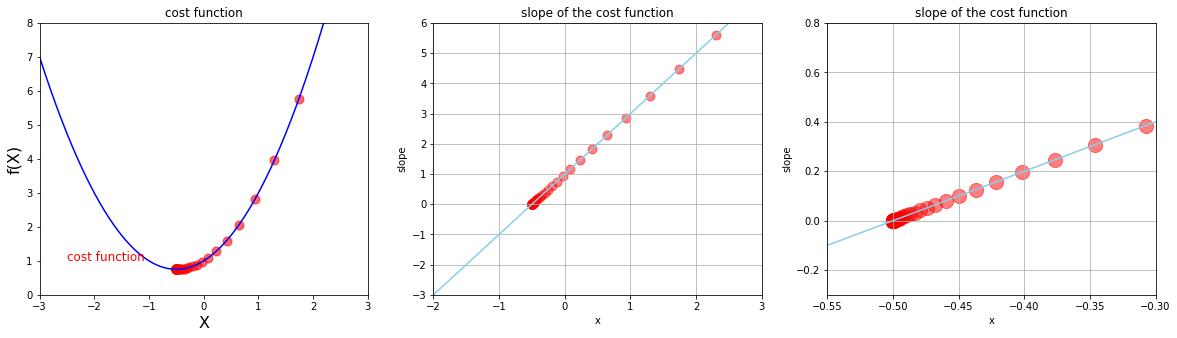

In [9]:
# superimpose the gradient descent calculation on plot 

# 1 chart: cost function
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.title('cost function')
plt.xlim(-3,3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(X)', fontsize = 16)
plt.text(-2.5, 1 , 'cost function', c='red', fontsize=12)
plt.plot(x_1, f(x_1), 'blue')
#since f function cant read lists, we'll have to converst it to an np array:
values = np.array(x_list)
plt.scatter(x_list, f(values), c='red', s=80, alpha=0.6)
# an alternative way is this:            
# vals = list(map(f,x_list))
# plt.scatter(x_list, f(vals))



# 2 chartL Derivative
plt.subplot(1, 3, 2)
plt.plot(x_1, df(x_1), c='skyblue')
plt.xlabel('x')
plt.ylabel('slope')
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.title('slope of the cost function')
plt.scatter(x_list, slope_list, c='red', s=80, alpha=0.5)
plt.grid()

# 3 chart: Derivative closeup
plt.subplot(1, 3, 3)
plt.plot(x_1, df(x_1), c='skyblue')
plt.xlabel('x')
plt.ylabel('slope')
plt.xlim(-0.55,-0.3)
plt.ylim(-0.3,0.8)
plt.title('slope of the cost function')
plt.scatter(x_list, slope_list, c='red', s=200, alpha=0.5)
plt.grid()
plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advamced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [10]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)
def g(x):
    return x**4 -4*x**2 + 5
def dg(x):
    return 4*x**3 - 8*x
    

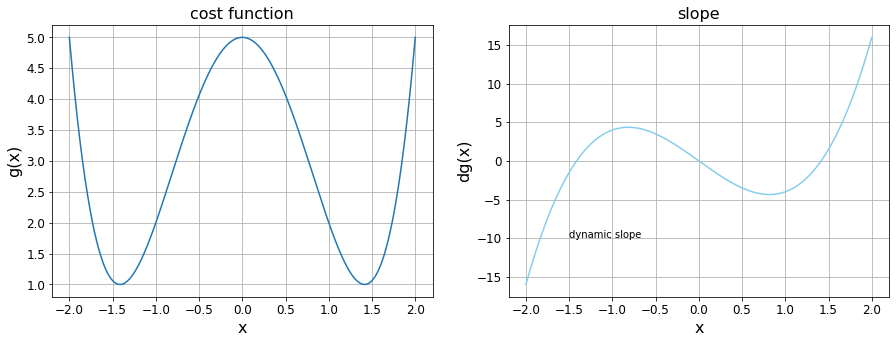

In [11]:
#ploting the curve and the slope

plt.figure(figsize=(15,5))
plt.subplot(1 , 2 , 1)
plt.plot(x_2, g(x_2))
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('cost function', fontsize=16)
plt.grid()

plt.subplot(1,2,2)
plt.plot(x_2, dg(x_2), c='skyblue')
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('slope', fontsize=16)
plt.text(-1.5,-10,'dynamic slope')
plt.grid()

plt.show()

## Gradient Descent

## Gradient Descent as a Python Function

In [12]:
def gradient_descent(d_func, initial_guess, multiplier=0.02, precision=0.001, max_iter = 300):
    new_x = initial_guess


    x_list = [new_x]
    slope_list = [d_func(new_x)]
    iterations=[0]
    counter=1

    for n in range(max_iter):
        previous_x = new_x
        gradient = d_func(previous_x)
        new_x = previous_x - multiplier * gradient
        iterations.append(counter)
        counter+=1

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(d_func(new_x))
        if step_size < precision:
            break
    return new_x, x_list, slope_list, iterations

In [15]:
local_min, list_x, deriv_list, it_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print(f'Local min is at {local_min}')
print(f'Number of steps: {len(list_x)}')
      

Local min is at 1.4122375085019094
Number of steps: 23


In [16]:
local_min, list_x, deriv_list, it_list = gradient_descent(dg, -0.1)
print(f'Local min is at {local_min}')
print(f'Number of steps: {len(list_x)}')
      

Local min is at -1.4120887490901561
Number of steps: 34


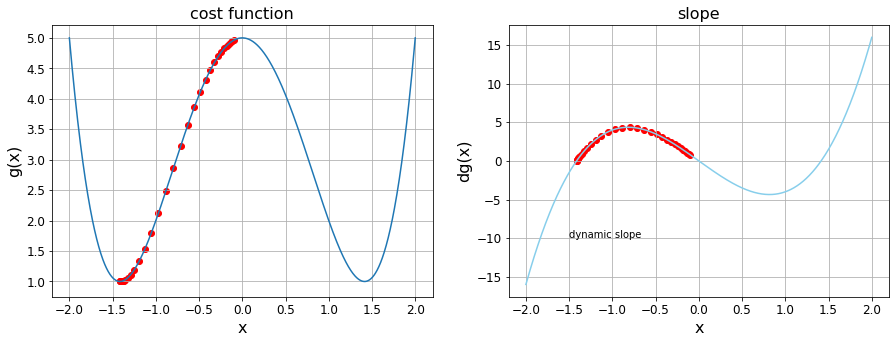

In [17]:
#ploting the curve and the slope in GD

plt.figure(figsize=(15,5))
plt.subplot(1 , 2 , 1)
plt.plot(x_2, g(x_2))
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('cost function', fontsize=16)
values = np.array(list_x)
plt.scatter(list_x, g(values), c='red')
plt.grid()

plt.subplot(1,2,2)
plt.plot(x_2, dg(x_2), c='skyblue')
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('slope', fontsize=16)
plt.text(-1.5,-10,'dynamic slope')
plt.scatter(list_x, deriv_list, c='red')
plt.grid()

plt.show()

# Example 3 - Divergence, Overflow and Python Tuples

## $$h(x) = x^5 -2x^4 +2$$

In [18]:
#Make Data
x_3 = np.linspace(-2.5, 2.5, 1000)

def h(x):
    return x**5 - 2*x**4 + 2
def dh(x):
    return 5*x**4 - 8*x**3

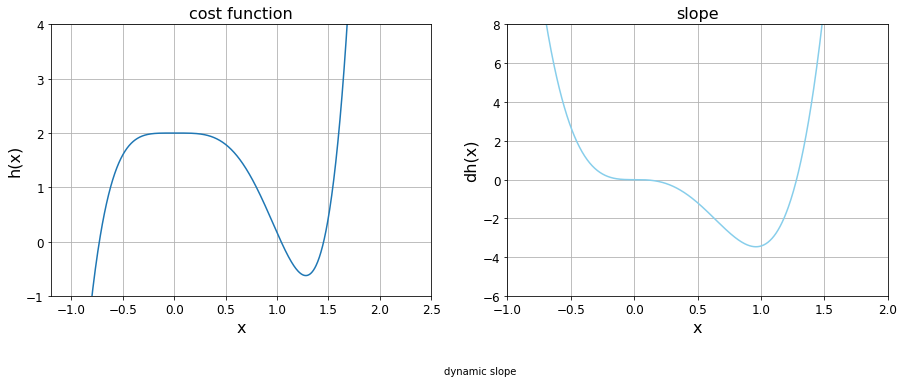

In [19]:
#ploting the curve and the slope

plt.figure(figsize=(15,5))
plt.subplot(1 , 2 , 1)
plt.plot(x_2, h(x_3))
plt.xlabel('x', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)
plt.title('cost function', fontsize=16)
plt.grid()

plt.subplot(1,2,2)
plt.plot(x_2, dh(x_3), c='skyblue')
plt.xlabel('x', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-1,2)
plt.ylim(-6,8)
plt.title('slope', fontsize=16)
plt.text(-1.5,-10,'dynamic slope')
plt.grid()

plt.show()

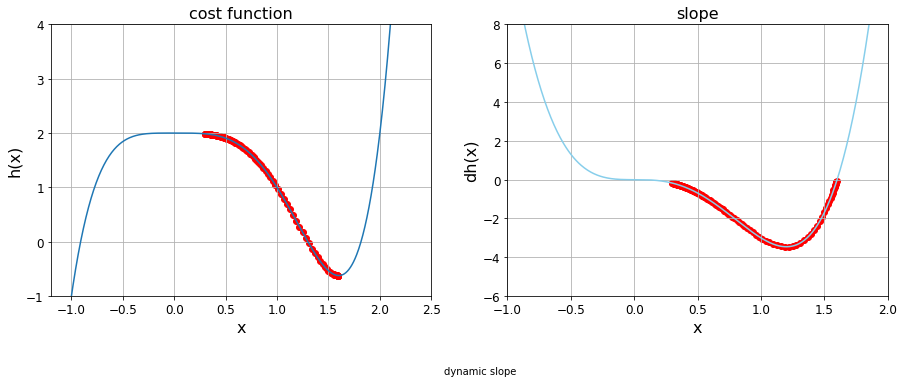

In [20]:
local_min, list_x, deriv_list, it_list = gradient_descent(dh, 0.3, 0.009, max_iter=500)

#ploting the curve and the slope in GD

plt.figure(figsize=(15,5))
plt.subplot(1 , 2 , 1)
plt.plot(x_3, h(x_3))
plt.xlabel('x', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)
plt.title('cost function', fontsize=16)
values = np.array(list_x)
plt.scatter(list_x, h(values), c='red')
plt.grid()

plt.subplot(1,2,2)
plt.plot(x_3, dh(x_3), c='skyblue')
plt.xlabel('x', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-1,2)
plt.ylim(-6,8)
plt.title('slope', fontsize=16)
plt.text(-1.5,-10,'dynamic slope')
plt.scatter(list_x, deriv_list, c='red')
plt.grid()

plt.show()


      

In [21]:

print(f'Local min is at {local_min}')
print(f'Number of steps: {len(list_x)}')
print(f'cost at this minimum is: {h(local_min)}')

Local min is at 1.59603810208793
Number of steps: 139
cost at this minimum is: -0.6212800609919586


In [22]:
import sys
sys.maxsize

9223372036854775807

In [23]:
sys.float_info.max

1.7976931348623157e+308

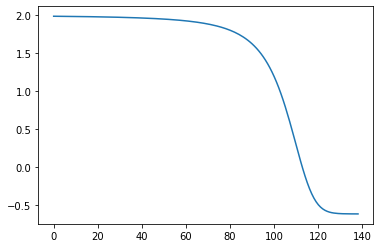

In [24]:
plt.plot(it_list, h(np.array(list_x)))
plt.show()

# Example 4 - Data Viz with 3D Charts 
## Minimuze $$f(x,y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimuze $$f(x,y) = \frac{1}{r+1}$$ where $r$ is $3^{-x^2 - y^2}$

In [25]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r+1)

In [26]:
#Make x y Data
x_4 = np.linspace(-2,2,200)
y_4 = np.linspace(-2,2,200)

In [27]:
print('Shape of X array',x_4.shape)

Shape of X array (200,)


In [28]:
x_4, y_4 = np.meshgrid(x_4, y_4)
print('Shape of X array',x_4.shape)

Shape of X array (200, 200)


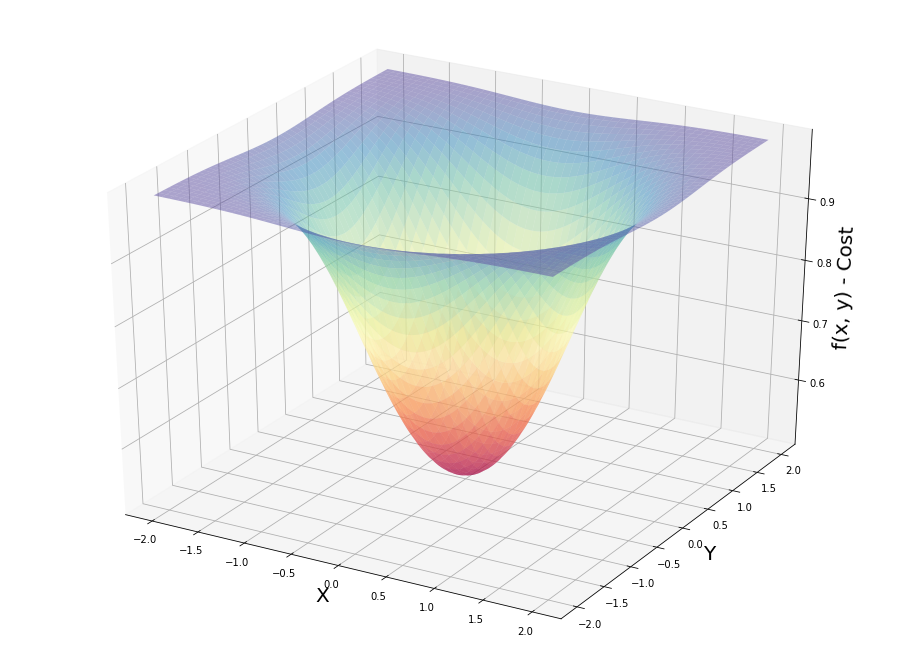

In [29]:
# Generating 3D Plot
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #color map
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.Spectral, alpha=0.5)
plt.show()

## Partial Derivatives & Symbolic Computation

In [30]:
from sympy import symbols, diff

In [31]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ',f(a, b))
diff(f(a,b), a).evalf(subs={a:1.8, b:1.0})

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)


0.0368089716197505

In [32]:
f(a, b).evalf(subs={a:1.8, b:1.0})

0.990604794032582

## Batch Gradient Descent with SymPy

In [38]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess

for n in range(max_iter):
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
#Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of', params[0])
print('Minimum occurs at y value of', params[1])
print('The cost is', f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of 3.45838599885832e-11
Minimum occurs at y value of 1.92132555492129e-11
The cost is 0.500000000000000
